In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
from tqdm import tqdm
import astropy.units as u
from astropy.constants import h, c, eps0, a0
from collections.abc import Sequence

#from light_old import GaussianBeam
from lightmatter import GaussianBeam, Lattice1d, BowtieLattice2d, LaserSetup

sns.set_style('whitegrid')

In [2]:
lat1 = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=0,
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=350,
    P=11,
    z0=0,
)

In [3]:
x, y, z = sp.symbols('x y z', real=True)
I = lat1.I_sym(x, y, z)

In [4]:
sp.simplify(I)

57165857.1105583*Abs(sqrt((exp((-5.90524934885299*I*x*(9.36369850749029e-7*x**2 + 122500.0)*(y**2 + z**2) - I*(5.90524934885299*x - 1.0*atan(2.76474872571064e-6*x))*(9.36369850749029e-7*x**2 + 122500.0)*(2.0*x**2 + 261648748946.816) - 1.0*(2.0*x**2 + 261648748946.816)*(y**2 + z**2))/((9.36369850749029e-7*x**2 + 122500.0)*(2.0*x**2 + 261648748946.816))) + exp((5.90524934885299*I*x*(9.36369850749029e-7*x**2 + 122500.0)*(y**2 + z**2) + I*(5.90524934885299*x - 1.0*atan(2.76474872571064e-6*x))*(9.36369850749029e-7*x**2 + 122500.0)*(2.0*x**2 + 261648748946.816) - 1.0*(2.0*x**2 + 261648748946.816)*(y**2 + z**2))/((9.36369850749029e-7*x**2 + 122500.0)*(2.0*x**2 + 261648748946.816))))**2))**2/(7.6438355163186e-12*x**2 + 1)

In [5]:
bowtie = BowtieLattice2d(
    lattice_direction_vec1=(1,0,0),
    lattice_direction_vec2=(0,1,0),
    pol_Jones_vec=(0,1),
    lambda_=1064,
    w0=350,
    P=11,
    z0=0,
)

In [6]:
x, y, z = sp.symbols('x y z', real=True)
I = bowtie.I_sym(x, y, z)

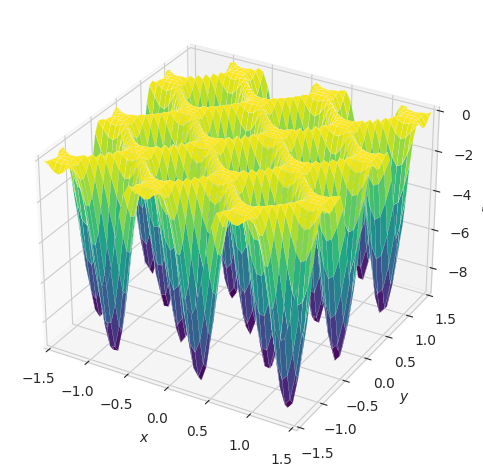

In [7]:
I_z0 = I.subs(z, 0)

sp.plotting.plot3d(-I_z0, (x, -1.5, 1.5), (y, -1.5, 1.5))

In [8]:
beam = GaussianBeam(
    beam_direction_vec=(0,1,0),
    pol_Jones_vec=(0,1),
    lambda_=1064,
    w0=1000,
    P=11,
    z0=0,
)

In [9]:
beam._rotation_matrix_sym

Matrix([
[1.0,    0,   0],
[  0,    0, 1.0],
[  0, -1.0,   0]])

In [10]:
x, y, z = sp.symbols('x y z', real=True)

E = beam.E_sym(x,y,z)
I = beam.I_sym(x,y,z)
E_vec = beam.E_vec_sym(x,y,z)

In [11]:
I

7002817.49604339*exp(-2*(1.0*x**2 + 1.0*z**2)/(1.14705306716756e-7*y**2 + 1000000.0))/(1.14705306716756e-13*y**2 + 1)

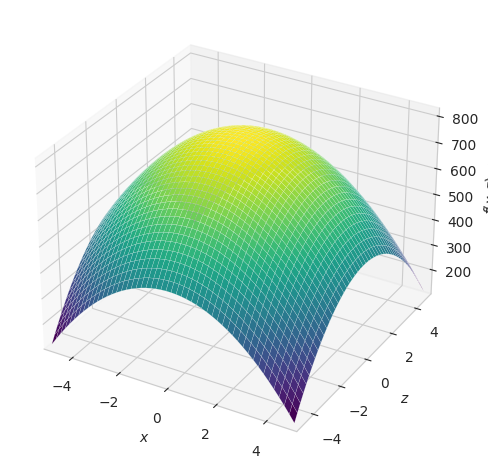

In [6]:
I_z0 = I.subs(y, 0)

sp.plotting.plot3d(I_z0, (x, -5, 5), (z, -5, 5))

In [7]:
E

72638.4695851485*exp((-5.90524934885299*I*z*(x**2 + y**2)*(1.14705306716756e-7*z**2 + 1000000.0) - 1.0*(x**2 + y**2)*(2.0*z**2 + 17435984936064.4) + I*(-5.90524934885299*z + 1.0*atan(3.38681718899553e-7*z))*(1.14705306716756e-7*z**2 + 1000000.0)*(2.0*z**2 + 17435984936064.4))/((1.14705306716756e-7*z**2 + 1000000.0)*(2.0*z**2 + 17435984936064.4)))/sqrt(1.14705306716756e-13*z**2 + 1)

In [4]:
I

7002817.49604339*exp(3.28932684724627e-27*(-3.04013570690663e+26*((1.14705306716756e-13*re(z)**2 + 1.14705306716756e-13*im(z)**2 - 1)**2*im(z)**2 + (1.14705306716756e-13*re(z)**2 + 1.14705306716756e-13*im(z)**2 + 1)**2*re(z)**2)*(9.17642453734048e-7*(re(x)*im(x) + re(y)*im(y))*re(z)*im(z) + 2.0*(1.14705306716756e-7*re(z)**2 - 1.14705306716756e-7*im(z)**2 + 1000000.0)*(re(x)**2 + re(y)**2 - im(x)**2 - im(y)**2)) + 3.04013570690663e+26*((1.14705306716756e-13*re(z)**2 + 1.14705306716756e-13*im(z)**2 - 1)**2*im(z)**2 + (1.14705306716756e-13*re(z)**2 + 1.14705306716756e-13*im(z)**2 + 1)**2*re(z)**2)*(1000000000000.0*(1.14705306716756e-13*re(z)**2 - 1.14705306716756e-13*im(z)**2 + 1)**2 + 5.26292295559403e-14*re(z)**2*im(z)**2)*(11.810498697706*im(z) - 2.0*im(atan(3.38681718899553e-7*z))) + (23.620997395412*(re(x)*im(x) + re(y)*im(y))*(2.0*re(z)**2 + 2.0*im(z)**2 + 17435984936064.4)*re(z) + 11.810498697706*(-2.0*re(z)**2 - 2.0*im(z)**2 + 17435984936064.4)*(re(x)**2 + re(y)**2 - im(x)**2 - im

In [9]:
beam.w_sym(z)

1000.0*sqrt(1.14705306716756e-13*z**2 + 1)

In [3]:
z = sp.symbols('z')

w = beam.w_sym(z)
R = beam.R_sym(z)
Psi = beam.Psi_sym(z)

In [4]:
w

[350.0*sqrt(7.6438355163186e-12*z**2 + 1), 175.0*sqrt(1.22301368261098e-10*z**2 + 1)]

In [5]:
R

[z + 130824374473.408/z, z + 8176523404.58799/z]

In [6]:
Psi

[atan(2.76474872571064e-6*z), atan(1.10589949028426e-5*z)]

In [18]:
lat1 = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=0,
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

lat2 = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=45,
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

lat3 = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=90,
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

In [19]:
n = 101

x = np.linspace(-1, 1, n) * u.um
y = np.linspace(-1000, 1000, n) * u.um
z = np.linspace(-1000, 1000, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

I1 = lat1.I(X, Y, Z)
I2 = lat2.I(X, Y, Z)
I3 = lat3.I(X, Y, Z)

/home/lelo/anaconda3/envs/lightmatter/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


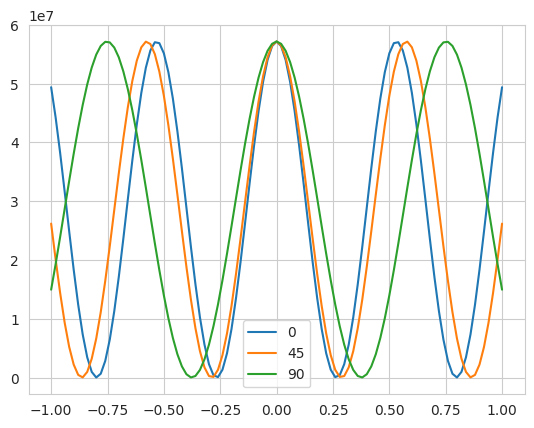

In [20]:
plt.plot(x.value, I1.value[:, n//2, n//2], label='0')
plt.plot(x.value, I2.value[:, n//2, n//2], label='45')
plt.plot(x.value, I3.value[:, n//2, n//2], label='90')
plt.legend()

In [21]:
bowtie = BowtieLattice2d(
    lattice_direction_vec1=(1,0,0),
    lattice_direction_vec2=(0,1,0),
    pol_Jones_vec=(0,1),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

In [22]:
n = 101

x = np.linspace(-1, 1, n) * u.um
y = np.linspace(-1, 1, n) * u.um
z = np.linspace(-1000, 1000, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

I4 = bowtie.I(X, Y, Z).to(u.mW/u.cm**2)

In [23]:
lat1d_x = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=0,
    pol_Jones_vec=(0,1),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

lat1d_y = Lattice1d(
    lattice_direction_vec=(0,1,0),
    intersect_angle=0,
    pol_Jones_vec=(0,1),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

lasers = [lat1d_x, lat1d_y]

lat2d = LaserSetup(lasers)

In [24]:
I5 = lat2d.I(X, Y, Z).to(u.mW/u.cm**2)

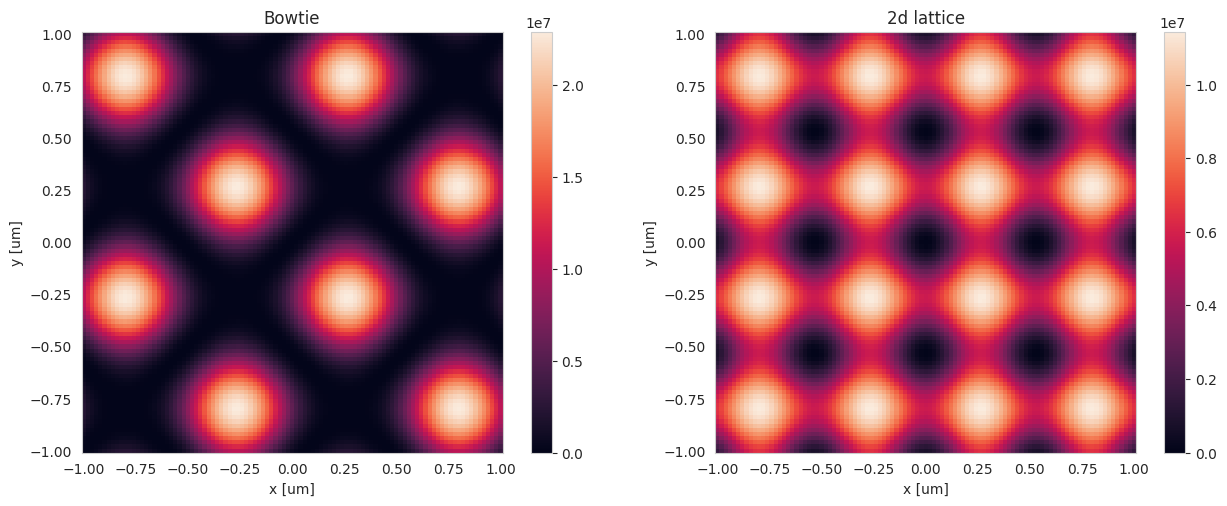

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

cb1 = axs[0].pcolormesh(x.value, y.value, I4[:,:,n//2].value)
axs[0].set_title('Bowtie')
axs[0].set_xlabel('x [um]')
axs[0].set_ylabel('y [um]')
axs[0].set_aspect('equal')

cb2 = axs[1].pcolormesh(x.value, y.value, I5[:,:,n//2].value)
axs[1].set_title('2d lattice')
axs[1].set_xlabel('x [um]')
axs[1].set_ylabel('y [um]')
axs[1].set_aspect('equal')

fig.colorbar(cb1)
fig.colorbar(cb2)
fig.tight_layout()

In [26]:
np.max(I4)

<Quantity 22863093.98938971 mW / cm2>

In [27]:
np.max(I5)

<Quantity 11431546.99469486 mW / cm2>

In [28]:
from astropy.constants import eps0, a0, h, hbar

alpha = (599.17 * 4*np.pi*eps0*a0**3 / h).to(u.Hz/(u.V/u.m)**2)
alpha

<Quantity 1.49092578e-05 m2 Hz / V2>

In [29]:
V_bowtie = - (1/(2*eps0*c) * alpha * I4).to(u.kHz)
V_lat2d = - (1/(2*eps0*c) * alpha * I5).to(u.kHz)

In [30]:
assert bowtie.k == lat2d.lasers[0].k, "We want same wavelength for regular and bowtie lattice"

m_K40 = 39.96399848 * u.u

Er = (hbar**2 * bowtie.k**2 / (2*m_K40) / h).to(u.kHz)
Er

<Quantity 4.40985944 kHz>

In [33]:
np.min(V_bowtie / Er)

<Quantity -145.60183569>

In [34]:
np.min(V_lat2d / Er)

<Quantity -72.80091785>

In [ ]:
beam1 = GaussianBeam(
    beam_direction_vec=(1,0,0),
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=(350, 175),
    P=11,
    z0=0,
)

beam2 = GaussianBeam(
    beam_direction_vec=(-1,0,0),
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=(350, 175),
    P=11,
    z0=0,
)

In [ ]:
n = 101

x = np.linspace(-1, 1, n) * u.um
y = np.linspace(-1000, 1000, n) * u.um
z = np.linspace(-1000, 1000, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

In [ ]:
Evec1 = beam1.E_vec(X, Y, Z)
Evec2 = beam2.E_vec(X, Y, Z)

In [ ]:
L = Evec1 + Evec2
L = L[0]*np.conjugate(L[0]) + L[1]*np.conjugate(L[1]) + L[2]*np.conjugate(L[2])
L.shape

(101, 101, 101)

/home/lelo/anaconda3/envs/lightmatter/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lelo/anaconda3/envs/lightmatter/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


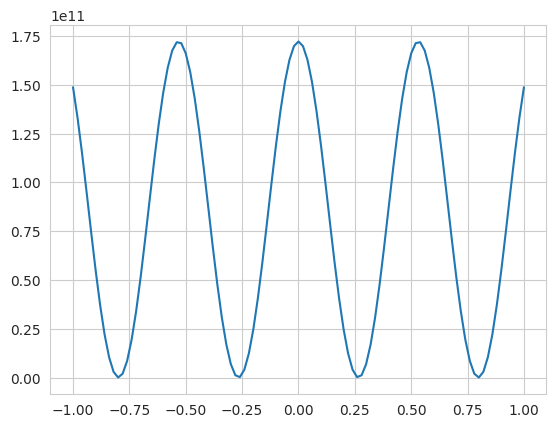

In [ ]:
plt.plot(x.value, L[:, n//2, n//2].value)

In [ ]:
beam = GaussianBeam(
    beam_direction_vec=(1,0,0),
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=700,
    P=11,
    z0=0,
)

In [ ]:
n = 101

x = np.linspace(-1000, 1000, n) * u.mm
y = np.linspace(-1000, 1000, n) * u.um
z = np.linspace(-1000, 1000, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

I = beam.I(X, Y, Z).value

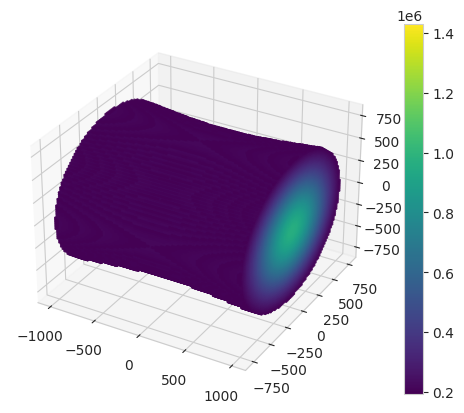

In [ ]:
mask = I > beam.I0.value/np.exp(2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[mask], Y[mask], Z[mask], c=I[mask], cmap='viridis', s=1)

fig.colorbar(ax.scatter(X[mask], Y[mask], Z[mask], c=I[mask], cmap='viridis', s=1))